In [13]:
import pandas as pd

bc = pd.read_csv('C:\\Users\\sjjung\\Desktop\\contestData\\bccard.csv')
bc


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,1411368,7
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,1386040,63
519294,202103,11,패션잡화,1113,시계/주얼리,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,390818,7
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,327592,7


In [14]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
%matplotlib inline

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family = font_name)

plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore') # Warning Message 안 보이게
import pandas.util.testing as tm

import matplotlib as mpl # 고해상도 Plot 을 위해 DPI 조절
mpl.rcParams['figure.dpi']=150



In [15]:
# 컬럼 재정렬
bc.drop(['고객소재지_광역시도','고객소재지_시군구','고객소재지_읍면동'],axis=1,inplace=True)
bc.drop(['품목대분류코드','품목중분류코드'],axis=1,inplace=True)
bc

,기준년월,품목대분류명,품목중분류명,성별,연령,가구생애주기,매출금액,매출건수
0,201903,의류,여성의류,여성,40대,초중고자녀가구,782521,13
1,201903,e상품/서비스,o2o서비스,여성,20대,신혼영유아가구,963789,29
2,201903,출산/육아,육아용품서비스,여성,30대,신혼영유아가구,924309,46
3,201903,e상품/서비스,e머니/상품권,여성,30대,신혼영유아가구,1089360,54
4,201903,생활,생활용품,여성,30대,신혼영유아가구,1656740,58
...,...,...,...,...,...,...,...,...
519292,202103,여가/스포츠,여행,여성,30대,1인가구,1411368,7
519293,202103,e상품/서비스,o2o서비스,남성,30대,1인가구,1386040,63
519294,202103,패션잡화,시계/주얼리,여성,30대,신혼영유아가구,390818,7
519295,202103,식품,가공식품,남성,40대,초중고자녀가구,327592,7


In [16]:
# 연령 컬럼 1,2,3,4,5,6
bc['연령'].unique() # array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

def age(x):
    if x == '20세 미만':
        return x.replace(x,'1')
    elif x == '20대':
        return x.replace(x,'2')
    elif x == '30대':
        return x.replace(x,'3')
    elif x == '40대':
        return x.replace(x,'4')
    elif x == '50대':
        return x.replace(x,'5')
    else:
        return x.replace(x,'6')

bc['연령'] = bc['연령'].apply(age)
bc['연령'] = bc['연령'].astype('int64')

In [18]:
# 성별 컬럼 여 1, 남 0
bc['성별'] = bc['성별'].apply(lambda x:1 if x=='여성' else 0)

In [20]:
# 파생변수 추가 매출평균
pd.options.display.float_format = '{:,.0f}'.format
bc['매출평균'] = bc['매출금액']/bc['매출건수']

In [22]:
# 파생변수2 추가 mz세대 -> 연령(1,2,3) -> 1, 나머지 0
bc['mz세대'] = bc['연령'].apply(lambda x:1 if x in (1,2,3) else 0)

In [24]:
bc

,기준년월,품목대분류명,품목중분류명,성별,연령,가구생애주기,매출금액,매출건수,매출평균,mz세대
0,201903,의류,여성의류,0,4,초중고자녀가구,782521,13,"60,194",0
1,201903,e상품/서비스,o2o서비스,0,2,신혼영유아가구,963789,29,"33,234",1
2,201903,출산/육아,육아용품서비스,0,3,신혼영유아가구,924309,46,"20,094",1
3,201903,e상품/서비스,e머니/상품권,0,3,신혼영유아가구,1089360,54,"20,173",1
4,201903,생활,생활용품,0,3,신혼영유아가구,1656740,58,"28,564",1
...,...,...,...,...,...,...,...,...,...,...
519292,202103,여가/스포츠,여행,0,3,1인가구,1411368,7,"201,624",1
519293,202103,e상품/서비스,o2o서비스,0,3,1인가구,1386040,63,"22,001",1
519294,202103,패션잡화,시계/주얼리,0,3,신혼영유아가구,390818,7,"55,831",1
519295,202103,식품,가공식품,0,4,초중고자녀가구,327592,7,"46,799",0


In [26]:
# MZ 아닌 다른세대 데이터프레임 구성
bc_ad = bc[bc['mz세대']==0]
bc_ad

,기준년월,품목대분류명,품목중분류명,성별,연령,가구생애주기,매출금액,매출건수,매출평균,mz세대
0,201903,의류,여성의류,0,4,초중고자녀가구,782521,13,"60,194",0
5,201903,뷰티,스킨케어,0,5,성인자녀가구,874323,8,"109,290",0
6,201903,뷰티,바디케어,0,4,초중고자녀가구,444666,13,"34,205",0
7,201903,의류,여성의류,0,4,신혼영유아가구,1048087,17,"61,652",0
9,201903,건강,건강식품,0,4,초중고자녀가구,529505,17,"31,147",0
...,...,...,...,...,...,...,...,...,...,...
519285,202103,건강,건강식품,0,6,노인가구,475730,16,"29,733",0
519286,202103,출산/육아,어린이용품서비스,0,5,성인자녀가구,259626,10,"25,963",0
519287,202103,e상품/서비스,o2o서비스,0,6,노인가구,385208,7,"55,030",0
519295,202103,식품,가공식품,0,4,초중고자녀가구,327592,7,"46,799",0


In [28]:
# 2019년도 기성세대 데이터프레임 구성
ad2019 = bc_ad[(bc_ad['기준년월']==201903) | (bc_ad['기준년월']==201909)]
ad2019.drop(['기준년월'],axis=1,inplace=True)

In [32]:
# 2020년,2021년도 기성세대 데이터프레임 구성
ad2021 = bc_ad[(bc_ad['기준년월']==202003) | (bc_ad['기준년월']==202009) | (bc_ad['기준년월']==202103)]
ad2021.drop(['기준년월'],axis=1,inplace=True)

In [35]:
#2020년,2021년도 기성세대 매출금액, 매출건수, 매출평균 컬럼 구하기
ad2021_total = ad2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
ad2021_avg = ad2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

ad2021_consume = pd.merge(ad2021_total,ad2021_avg)

In [53]:
# 기성세대 2020년,2021년도 매출건수, 매출금액, 매출평균별 정렬 상위 Top 15 항목 (순위 포함)
temp_ad_2021 = ad2021_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(15)
temp_ad_2021['매출순위'] = temp_ad_2021['매출건수'].rank(method='min',ascending=False)
temp_ad_2021

,품목대분류명,품목중분류명,매출금액,매출건수,매출평균,매출순위
1,e상품/서비스,o2o서비스,116884001252,2805465,"44,784",1
24,식품,신선/요리재료,26333715533,632595,"41,379",2
21,생활,생활용품,17112641564,457313,"39,018",3
23,식품,가공식품,12762883494,346588,"36,816",4
8,건강,건강식품,21304570017,346131,"62,015",5
30,여가/스포츠,취미/특기,20351566252,299808,"71,870",6
0,e상품/서비스,e머니/상품권,19240930474,273192,"67,942",7
25,식품,음료,7529707489,239902,"31,622",8
40,전자,디지털,19606743191,185890,"104,074",9
42,출산/육아,어린이용품서비스,6548399397,149962,"45,959",10


In [55]:
# 기성세대 2019년도 매출건수, 매출금액, 매출평균별 정렬 상위 Top 15 항목 (순위 포함)
ad2019_total = ad2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
ad2019_avg = ad2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

ad2019_consume = pd.merge(ad2019_total,ad2019_avg)

temp_ad_2019 = ad2019_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(15)

temp_ad_2019['매출순위'] = temp_ad_2019['매출건수'].rank(method='min',ascending=False)
temp_ad_2019

,품목대분류명,품목중분류명,매출금액,매출건수,매출평균,매출순위
1,e상품/서비스,o2o서비스,45409410892,992403,"49,973",1
20,생활,생활용품,9054121576,253431,"37,566",2
23,식품,신선/요리재료,8723318350,214766,"41,618",3
29,여가/스포츠,취미/특기,10685683394,168370,"68,907",4
8,건강,건강식품,7771937370,134742,"61,642",5
22,식품,가공식품,4507990750,127772,"35,771",6
0,e상품/서비스,e머니/상품권,7694676656,122535,"59,159",7
24,식품,음료,3387196632,106990,"32,233",8
28,여가/스포츠,여행,13285332716,103114,"134,593",9
39,전자,디지털,7286274622,92599,"83,727",10


In [75]:
# 기성세대 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성
cov_ad = pd.merge(temp_ad_2019,temp_ad_2021,how='inner',on='품목중분류명') 
cov_ad.drop(['품목대분류명_y'],axis=1,inplace=True)
cov_ad.columns = ['품목대분류','품목중분류','매출금액前','매출건수前','매출평균前','순위前','매출금액後','매출건수後','매출평균後','순위後']

cov_ad['변동순위'] = cov_ad['순위前'] - cov_ad['순위後']
cov_ad

,품목대분류,품목중분류,매출금액前,매출건수前,매출평균前,순위前,매출금액後,매출건수後,매출평균後,순위後,변동순위
0,e상품/서비스,o2o서비스,45409410892,992403,"49,973",1,116884001252,2805465,"44,784",1,0
1,생활,생활용품,9054121576,253431,"37,566",2,17112641564,457313,"39,018",3,-1
2,식품,신선/요리재료,8723318350,214766,"41,618",3,26333715533,632595,"41,379",2,1
3,여가/스포츠,취미/특기,10685683394,168370,"68,907",4,20351566252,299808,"71,870",6,-2
4,건강,건강식품,7771937370,134742,"61,642",5,21304570017,346131,"62,015",5,0
5,식품,가공식품,4507990750,127772,"35,771",6,12762883494,346588,"36,816",4,2
6,e상품/서비스,e머니/상품권,7694676656,122535,"59,159",7,19240930474,273192,"67,942",7,0
7,식품,음료,3387196632,106990,"32,233",8,7529707489,239902,"31,622",8,0
8,여가/스포츠,여행,13285332716,103114,"134,593",9,12243343044,142979,"87,909",11,-2
9,전자,디지털,7286274622,92599,"83,727",10,19606743191,185890,"104,074",9,1


In [76]:
# mz세대 2019년도 매출건수, 매출금액, 매출평균별 정렬 상위 Top 15 항목 (순위 포함)
bc_mz = bc[bc['mz세대']==1]
mz2019 = bc_mz[(bc_mz['기준년월']==201903) | (bc_mz['기준년월']==201909)]
mz2019.drop(['기준년월'],axis=1,inplace=True)
mz2019_total = mz2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
mz2019_avg = mz2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

mz2019_consume = pd.merge(mz2019_total,mz2019_avg)

temp_mz_2019 = mz2019_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(15)

temp_mz_2019['매출순위'] = temp_mz_2019['매출건수'].rank(method='min',ascending=False)
temp_mz_2019

,품목대분류명,품목중분류명,매출금액,매출건수,매출평균,매출순위
1,e상품/서비스,o2o서비스,75444670443,2177894,"35,641",1
0,e상품/서비스,e머니/상품권,12130597142,357165,"32,242",2
29,여가/스포츠,취미/특기,11948074811,277761,"49,305",3
20,생활,생활용품,9420996048,273967,"35,736",4
28,여가/스포츠,여행,18612978460,219269,"86,093",5
39,전자,디지털,11413984137,168325,"72,053",6
23,식품,신선/요리재료,6138445373,157861,"39,383",7
42,출산/육아,육아용품서비스,5045078776,142441,"39,483",8
41,출산/육아,어린이용품서비스,5261334781,132296,"43,419",9
8,건강,건강식품,6248144839,131312,"49,789",10


In [78]:
# mz세대 2020년도,2021년도 매출건수, 매출금액, 매출평균별 정렬 상위 Top 15 항목 (순위 포함)
mz2021 = bc_mz[(bc_mz['기준년월']==202003) | (bc_mz['기준년월']==202009) | (bc_mz['기준년월']==202103)]
mz2021.drop(['기준년월'],axis=1,inplace=True)

mz2021_total = mz2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
mz2021_avg = mz2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

mz2021_consume = pd.merge(mz2021_total,mz2021_avg)
temp_mz_2021 = mz2021_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(15)

temp_mz_2021['매출순위'] = temp_mz_2021['매출건수'].rank(method='min',ascending=False)
temp_mz_2021


,품목대분류명,품목중분류명,매출금액,매출건수,매출평균,매출순위
1,e상품/서비스,o2o서비스,146902585187,4453158,"32,793",1
0,e상품/서비스,e머니/상품권,24315289844,596423,"39,002",2
30,여가/스포츠,취미/특기,22406531038,498083,"49,517",3
21,생활,생활용품,13223081546,389597,"35,582",4
24,식품,신선/요리재료,12794976089,343474,"37,394",5
40,전자,디지털,21924514467,275125,"84,993",6
23,식품,가공식품,8139735406,269966,"30,134",7
8,건강,건강식품,11987561626,243171,"48,596",8
29,여가/스포츠,여행,14682088802,222861,"68,020",9
25,식품,음료,5419862816,216789,"25,014",10


In [80]:
# mz세대 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성
cov_mz = pd.merge(temp_mz_2019,temp_mz_2021,how='inner',on='품목중분류명') 
cov_mz.drop(['품목대분류명_y'],axis=1,inplace=True)
cov_mz.columns = ['품목대분류','품목중분류','매출금액前','매출건수前','매출평균前','순위前','매출금액後','매출건수後','매출평균後','순위後']

cov_mz['변동순위'] = cov_mz['순위前'] - cov_mz['순위後']
cov_mz

,품목대분류,품목중분류,매출금액前,매출건수前,매출평균前,순위前,매출금액後,매출건수後,매출평균後,순위後,변동순위
0,e상품/서비스,o2o서비스,75444670443,2177894,"35,641",1,146902585187,4453158,"32,793",1,0
1,e상품/서비스,e머니/상품권,12130597142,357165,"32,242",2,24315289844,596423,"39,002",2,0
2,여가/스포츠,취미/특기,11948074811,277761,"49,305",3,22406531038,498083,"49,517",3,0
3,생활,생활용품,9420996048,273967,"35,736",4,13223081546,389597,"35,582",4,0
4,여가/스포츠,여행,18612978460,219269,"86,093",5,14682088802,222861,"68,020",9,-4
5,전자,디지털,11413984137,168325,"72,053",6,21924514467,275125,"84,993",6,0
6,식품,신선/요리재료,6138445373,157861,"39,383",7,12794976089,343474,"37,394",5,2
7,출산/육아,육아용품서비스,5045078776,142441,"39,483",8,6616821540,172227,"41,154",11,-3
8,출산/육아,어린이용품서비스,5261334781,132296,"43,419",9,6751593359,161256,"44,606",12,-3
9,건강,건강식품,6248144839,131312,"49,789",10,11987561626,243171,"48,596",8,2


<AxesSubplot:ylabel='mz세대'>

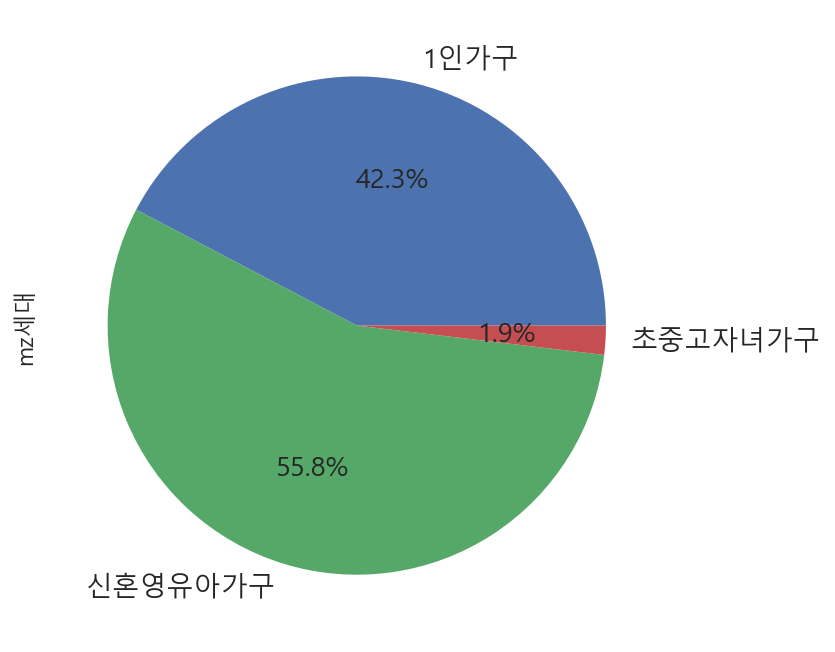

In [97]:
bc_mz
family_Type_mz2019 = mz2019.groupby('가구생애주기')['mz세대'].count()
family_Type_mz2021 = mz2021.groupby('가구생애주기')['mz세대'].count()
family_Type_mz2019.plot(kind='pie',autopct='%1.1f%%',fontsize=13)
#family_Type_mz2021

<AxesSubplot:ylabel='mz세대'>

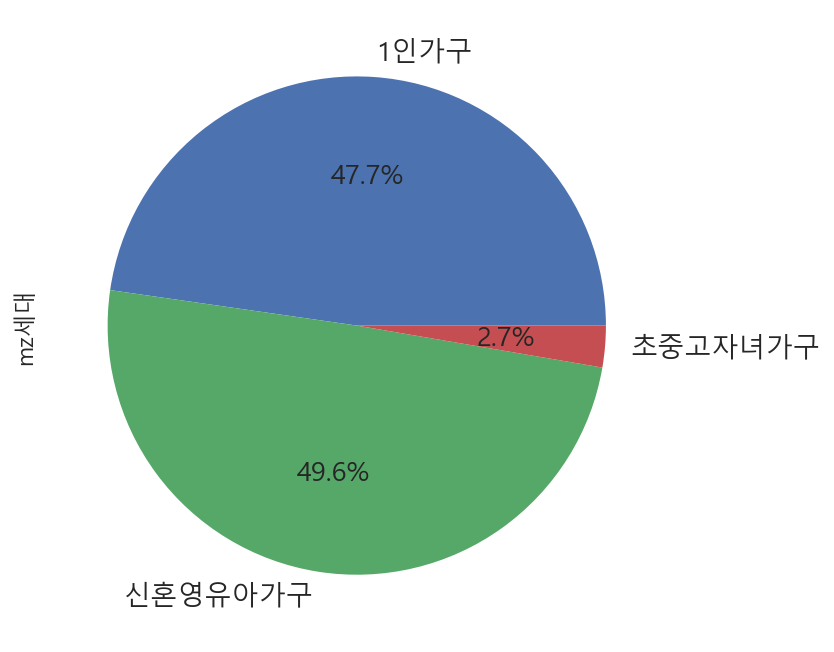

In [99]:
family_Type_mz2021.plot(kind='pie',autopct='%1.1f%%',fontsize=13)

<AxesSubplot:ylabel='mz세대'>

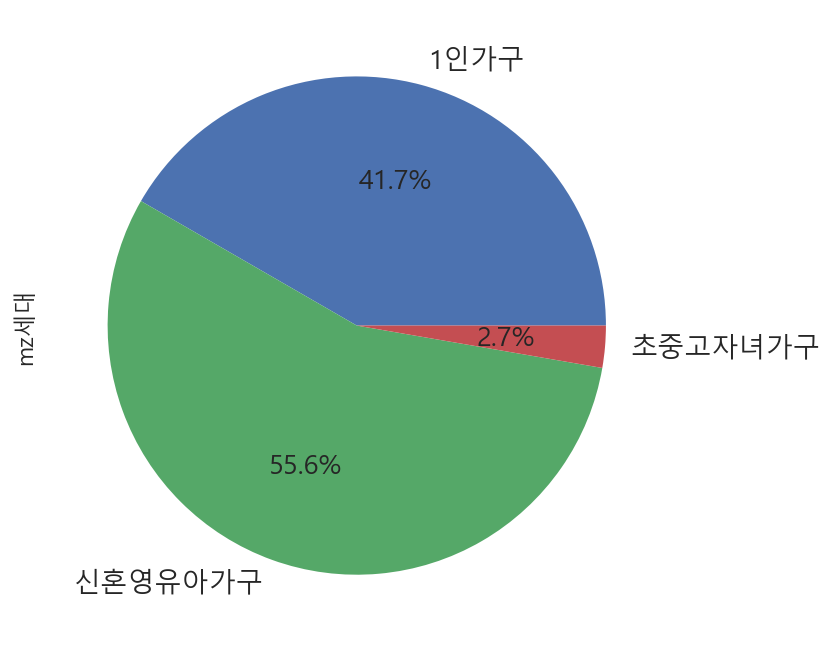

In [106]:
pfood_mz2019 = mz2019[mz2019['품목중분류명']=='가공식품']
pfood_mz2019.groupby('가구생애주기')['mz세대'].count().plot(kind='pie',autopct='%1.1f%%',fontsize=13)

<AxesSubplot:ylabel='mz세대'>

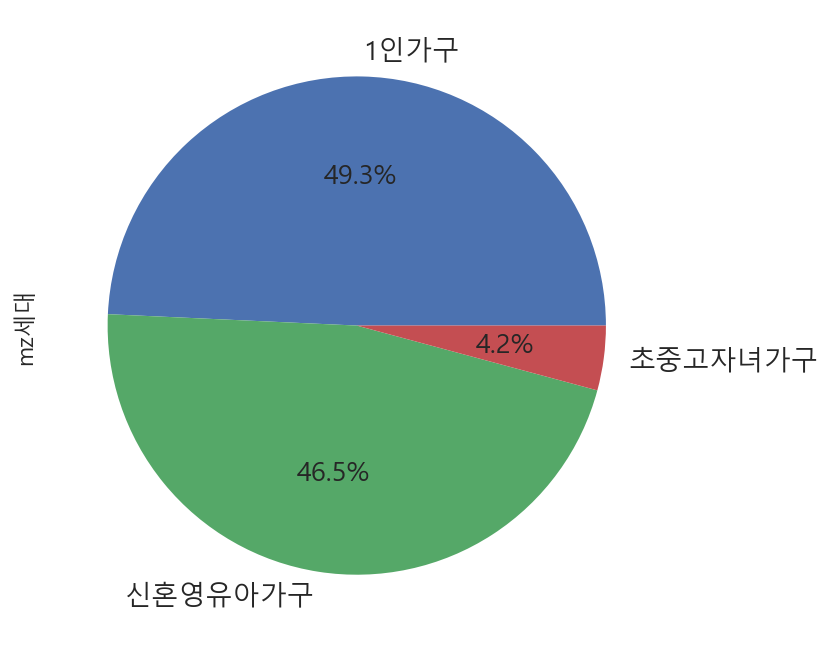

In [108]:
pfood_mz2021 = mz2021[mz2021['품목중분류명']=='가공식품']
pfood_mz2021.groupby('가구생애주기')['mz세대'].count().plot(kind='pie',autopct='%1.1f%%',fontsize=13)

<AxesSubplot:ylabel='mz세대'>

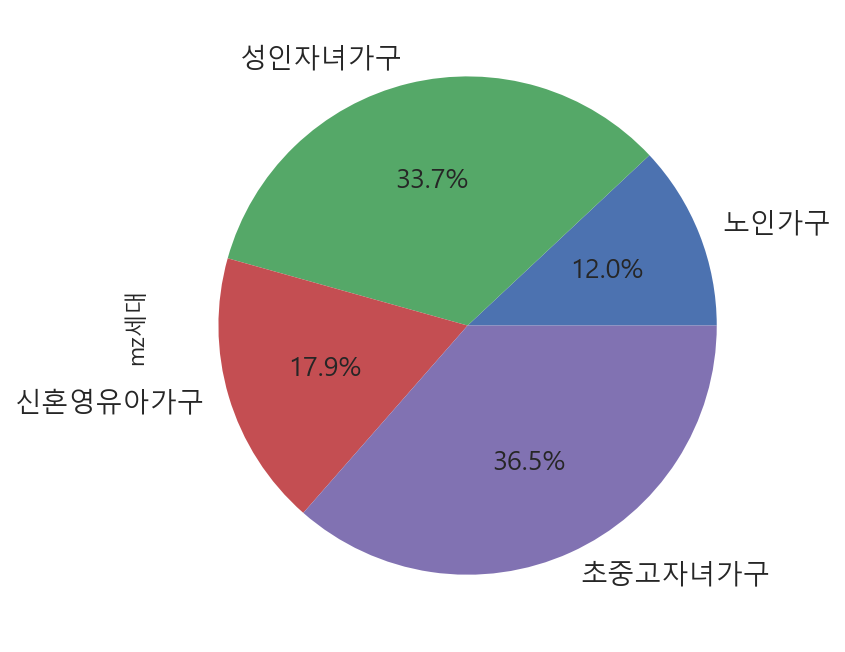

In [115]:
ad2019
pfood_ad2019 = ad2019[ad2019['품목중분류명']=='가공식품']
pfood_ad2019.groupby('가구생애주기')['mz세대'].count().plot(kind='pie',autopct='%1.1f%%',fontsize=13)

<AxesSubplot:ylabel='mz세대'>

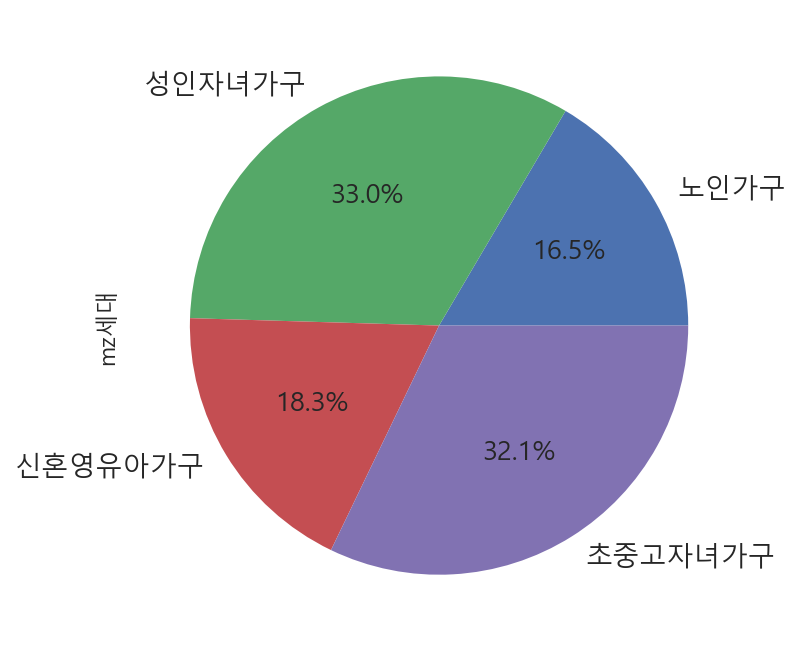

In [116]:
ad2021
pfood_ad2021 = ad2021[ad2021['품목중분류명']=='가공식품']
pfood_ad2021.groupby('가구생애주기')['mz세대'].count().plot(kind='pie',autopct='%1.1f%%',fontsize=13)